# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

Загружаем данные из csv-файла в датафрейм c помощью библиотеки pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Изучичаем общую информацию о полученном датафрейме.

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограмму для всех числовых столбцов таблицы на одном графике. 

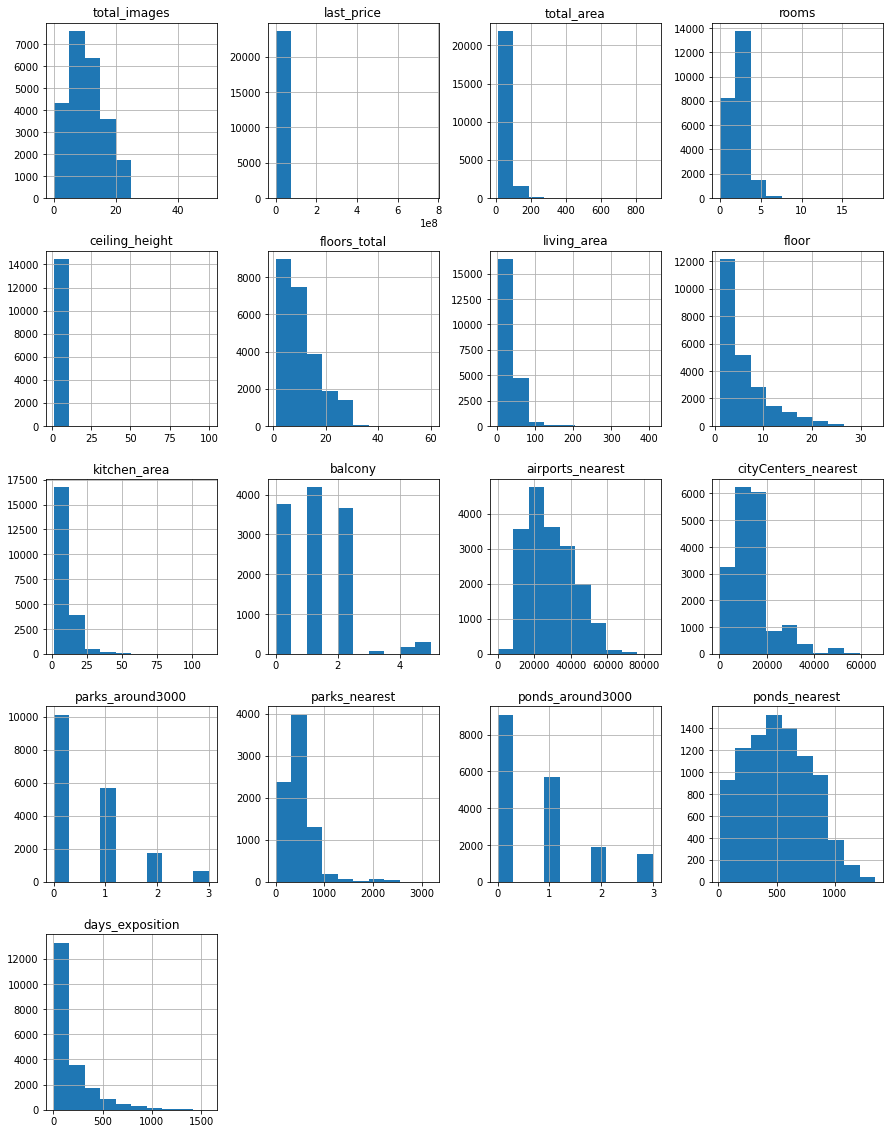

In [4]:
data.hist(figsize=(15, 20))
plt.show()

Вывод: 
В данных есть пропуски - нужно изучить их и заполнить пропуски там, где это возможно. А также необходимо уточнить название одного столбца и изменить тип данных в нескольких столбцах

### Выполните предобработку данных

In [5]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace = True )

2.1 Найти и изучить пропущенные значения

Найдем и изучим пропущенные значения в столбцах:

In [6]:
print(data.isna().sum()) 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Заполним пропущенные значения там, где это возможно. 

Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. 
Заменим все пропущенные значения в столбце нулями.

In [7]:
data['balcony'] = data['balcony'].fillna(0)

Заполним пропуски в столбце "высота_потолка" средним значением, а пропуски в столбце "название местности" на unknown 

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [9]:
data['locality_name'] = data['locality_name'].fillna('unknown')

In [10]:
len(data.loc[(data['kitchen_area'].isna()) & (data['living_area'].isna())])

1464

1464 продавцов (около 6% от всех данных) не указали данные о жилой площади и кухонной площади, хотя эти данные являются довольно важными при определении стоимости квартиры, пропущенные значения могут повлиять на результаты.

In [11]:
len(data.loc[(data['parks_around3000'].isna()) & (data['ponds_around3000'].isna())])

5518

Клиенты могли не предоставить данные. Возможно, эта информация не необходима в некоторых случаях. Проблемы могли возникнуть на этапе загрузки и на этапе выгрузки данных. Неправильный запрос, объединение таблиц также может быть причиной.

Пропуски в 'parks_around3000' и 'ponds_around3000' находятся на одних строках, значений 5518, что совпадает со значениями пропусков в обоих столбцах по отдельности, а значит ошибка произошла при выгрузке данных из геосервисов.

2.2 Найдем столбцы, в которых нужно изменить тип данных.

Менять тип данных будем в столбцах:
    first_day_exposition(дата),    floors_total (целое число), is_apartment (булевый/логический тип данных),    balcony  (целое число)          

In [12]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

In [13]:
data['balcony'] = data['balcony'].astype('int')

In [14]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [15]:
data['floors_total'].unique()

#data['floors_total'] = data['floors_total'].astype('int') # не понимаю, почему выдает ошибку, если количество этажей это только целые числа

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [16]:
data.info() #проверяем замену 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

2.3 Изучение уникальных значений в столбце с названиями и устранение неявных дубликатов. 

In [17]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:
len(data['locality_name'].unique())

365

In [19]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок ','при железнодорожной станции ', 'платформа ', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'станции ', 'село ', 'пансионат ', 'городского типа ',
             'деревня ', 'городской поселок '], '', regex=True)
) 
set(data['locality_name'].unique()) # уникальные значения в алфавитном порядке

{'unknown',
 'Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпоселок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичево',
 'Иссад',
 'Калитино',
 'Каложицы',

In [20]:
len(data['locality_name'].unique())

315

Количество уникальных значений уменьшилось с 365 до 315. 

### Добавьте в таблицу новые столбцы

Столбец 'price_square_meter' цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой)

In [21]:
data['price_square_meter'] = (data['last_price'] / data['total_area']).round(2)

Столбец 'day_publication' день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [22]:
data['day_publication'] = data['first_day_exposition'].dt.weekday 

Столбец 'month_publication' месяц публикации объявления

In [23]:
data['month_publication'] = data['first_day_exposition'].dt.month 

Столбец 'year_publication' год публикации объявления

In [24]:
data['year_publication'] = data['first_day_exposition'].dt.year 

Столбец 'type_floor' тип этажа квартиры (значения — «первый», «последний», «другой»)

In [25]:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['type_floor'] = data.apply(floor, axis=1) 

Столбец 'city_centers_nearest_km' расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [26]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round(0)

Была выполнена предобработка данных:
- заполнены пропущенные значения там, где это возможно;
- в нескольких столбцах изменен тип данных;
- были добавлены новые столбцы для удобства исследовательского анализа данных. 



### Проведите исследовательский анализ данных

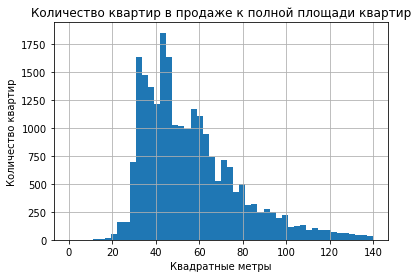

In [27]:
data['total_area'].hist(bins=50, range=(0, 140))
plt.title('Количество квартир в продаже к полной площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

На рынке самое большое предложение квартир с общей площадью от 30 до 70 кв. метров с максимумом около 43 кв. метров.

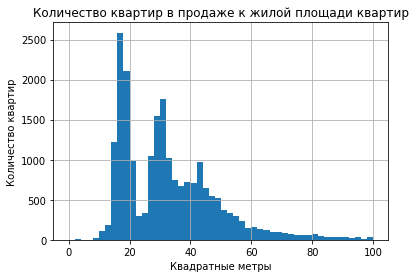

In [28]:
data['living_area'].hist(bins=50, range=(0, 100))
plt.title('Количество квартир в продаже к жилой площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

На рынке самое большое предложение квартир с жилой площадью от 15 до 30 кв. метров, а также есть спад предложения в районе 25 кв. метров

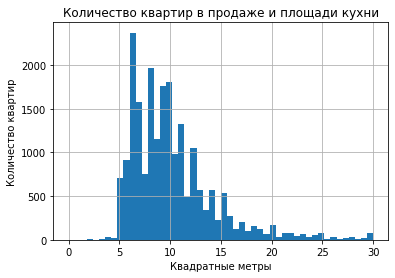

In [29]:
data['kitchen_area'].hist(bins=50, range=(0, 30))
plt.title('Количество квартир в продаже и площади кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

На рынке самое большое предложение квартир с площадью кухни от 6 до 12 кв. метров с максимумом около 6 кв. метров.

In [30]:
data['last_price'].unique()

array([13000000.,  3350000.,  5196000., ...,  6151120., 21400000.,
       11475000.])

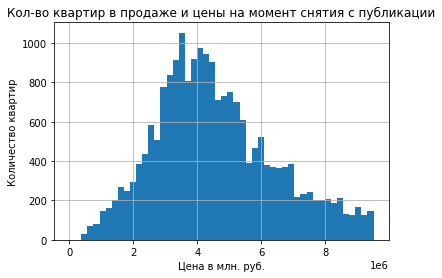

In [31]:
data['last_price'].hist(bins=50, range=(0, 9.5e+06))
plt.title('Кол-во квартир в продаже и цены на момент снятия с публикации')
plt.ylabel('Количество квартир')
plt.xlabel('Цена в млн. руб.')
plt.show()

Чаще всего цена объекта составляет 3-4 млн.

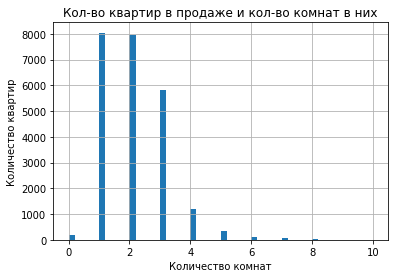

In [32]:
data['rooms'].hist(bins=50, range=(0, 10))
plt.title('Кол-во квартир в продаже и кол-во комнат в них')
plt.ylabel('Количество квартир')
plt.xlabel('Количество комнат')
plt.show()

Большинство квартир, выставленных на продажу, 1-3 комнатные

In [33]:
set(data['ceiling_height'].unique())

{1.0,
 1.2,
 1.75,
 2.0,
 2.2,
 2.25,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,

In [34]:
data.loc[data['ceiling_height'] >= 20.0, 'ceiling_height'] = data['ceiling_height']/10

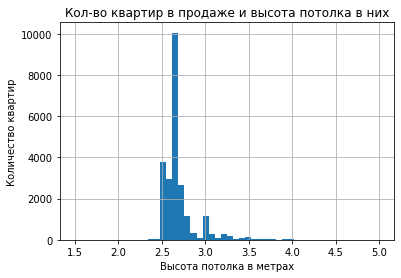

In [35]:
data['ceiling_height'].hist(bins=50, range=(1.5, 5))
plt.title('Кол-во квартир в продаже и высота потолка в них')
plt.ylabel('Количество квартир')
plt.xlabel('Высота потолка в метрах')
plt.show()

На рынке самое большое предложение квартир с высотой потолков от 2,5 до 2,8 метров с максимумом 2,5 метров.

<AxesSubplot:>

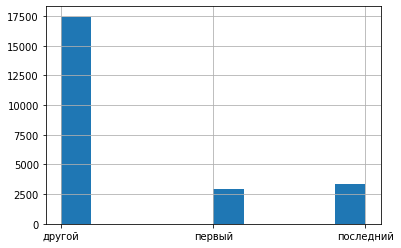

In [36]:
data['type_floor'].hist()

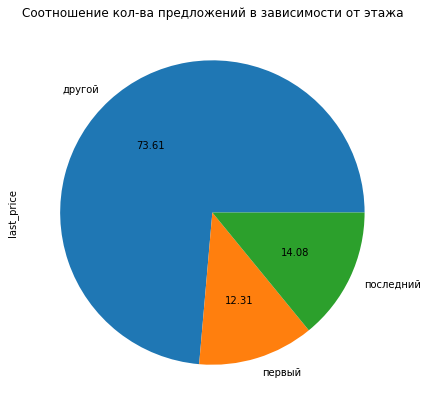

In [37]:
data.pivot_table(index='type_floor',values='last_price',aggfunc='count') \
  .plot.pie(y='last_price', figsize=(10,7), autopct='%.2f')

plt.legend("", frameon=False)
plt.title('Соотношение кол-ва предложений в зависимости от этажа')
plt.show()


Четверть предложений на рынке квартиры первого и последнего этажа, что скорее много. Чтобы сделать качественные выводы, нужно понимать какая этажность застройки приобладает в данном регионе. 

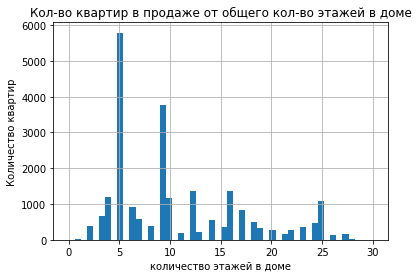

In [38]:
data['floors_total'].hist(bins=50, range=(0, 30))
plt.title('Кол-во квартир в продаже от общего кол-во этажей в доме')
plt.ylabel('Количество квартир')
plt.xlabel('количество этажей в доме')
plt.show()

На рынке самое большое предложение квартир в пяти- и девятиэтажках.

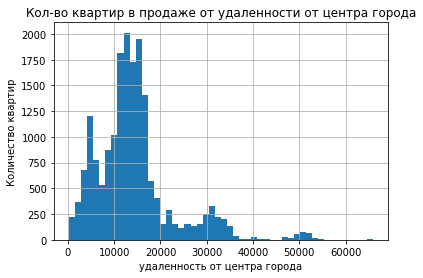

In [39]:
data['city_centers_nearest'].hist(bins=50)
plt.title('Кол-во квартир в продаже от удаленности от центра города')
plt.ylabel('Количество квартир')
plt.xlabel('удаленность от центра города')
plt.show()

Больше всего предложений на расстоянии 12 -15 км от центра, и довольно много на расстоянии в 5 км от центра города.
Если Адмиралтейство является центром города, то 5 км от него - это центр города, а 12-15 км это спальный район.

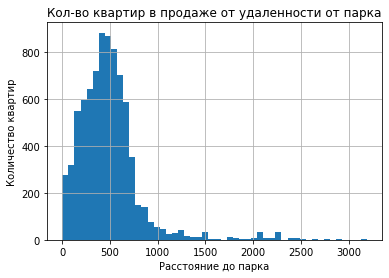

In [40]:
data['parks_nearest'].hist(bins=50)
plt.title('Кол-во квартир в продаже от удаленности от парка')
plt.ylabel('Количество квартир')
plt.xlabel('Расстояние до парка')
plt.show()

На рынке много предложений квартир со средним расстоянием до парка примерно 200 - 700 метров.

4.2. Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
Постройте гистограмму.
Посчитайте среднее и медиану.
В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

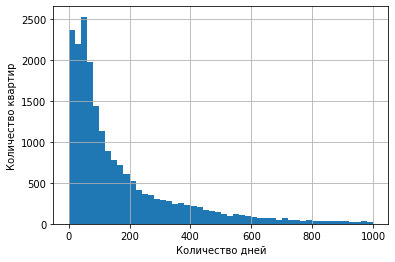

In [41]:
data['days_exposition'].hist(bins=50, range=(0, 1000))

plt.ylabel('Количество квартир')
plt.xlabel('Количество дней')
plt.show()

In [42]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Обычно продажа занимает до 100 дней (3-4 месяца), быстрыми продажами можно считать меньше 45 дней (месяц), необычно долгими - больше 232 дней (больше полугода).

4.3. Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта.
Изучите, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

In [43]:
print(data.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms','day_publication','month_publication','year_publication']).corr())

                   day_publication  kitchen_area  last_price  living_area  \
day_publication           1.000000      0.454518    0.323738     0.083444   
kitchen_area              0.454518      1.000000    0.361686     0.106517   
last_price                0.323738      0.361686    1.000000     0.655849   
living_area               0.083444      0.106517    0.655849     1.000000   
month_publication         0.269221     -0.022142   -0.019113    -0.154943   
rooms                    -0.059111      0.094420    0.442449     0.897739   
total_area                0.320962      0.411305    0.738972     0.923741   
year_publication          0.181063     -0.325874   -0.052080    -0.068297   

                   month_publication     rooms  total_area  year_publication  
day_publication             0.269221 -0.059111    0.320962          0.181063  
kitchen_area               -0.022142  0.094420    0.411305         -0.325874  
last_price                 -0.019113  0.442449    0.738972         -0

Корреляция по данным указывает, что прямой зависимости среди данных нет. Скорее всего это произошло из-за наличия большого количества выбросов.

Уберем выбросы с помощью функиции 

In [44]:
# Функция для подсчёта границ с размахом 1.5
def quartile_range(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    dfq = data.loc[(data[column] < q3 + 1.5*iqr) & (data[column] > q1 - 1.5*iqr), column]
    return dfq

list_features = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms'] # Столбцы с выбросами

for col in list_features:
    data[col] = quartile_range(data, col)

In [45]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_publication,month_publication,year_publication,type_floor,city_centers_nearest_km
0,20,NaN,108.00,2019-03-07,3.0,2.70,16.0,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1.0,2.65,11.0,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2.0,2.65,5.0,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,NaN,NaN,2015-07-24,3.0,2.65,14.0,NaN,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2.0,3.03,14.0,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,NaN,2017-03-21,3.0,3.70,5.0,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3.0,2.65,5.0,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2.0,2.65,3.0,29.7,1,True,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2.0,3.00,17.0,NaN,12,True,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,другой,10.0


In [46]:
print(data.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms']).corr())

              kitchen_area  last_price  living_area     rooms  total_area
kitchen_area      1.000000    0.418146    -0.228340 -0.253448    0.236823
last_price        0.418146    1.000000     0.725857  0.551637    0.905255
living_area      -0.228340    0.725857     1.000000  0.901722    0.917353
rooms            -0.253448    0.551637     0.901722  1.000000    0.786100
total_area        0.236823    0.905255     0.917353  0.786100    1.000000


Заметна прямая зависимость между: ценой и полной площадью, ценой и жилой площадью (логично:))

In [47]:
print(data.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms','day_publication','month_publication','year_publication']).corr())

                   day_publication  kitchen_area  last_price  living_area  \
day_publication           1.000000      0.603604    0.667832     0.165269   
kitchen_area              0.603604      1.000000    0.418146    -0.228340   
last_price                0.667832      0.418146    1.000000     0.725857   
living_area               0.165269     -0.228340    0.725857     1.000000   
month_publication         0.269221      0.197233    0.032230    -0.143652   
rooms                    -0.045460     -0.253448    0.551637     0.901722   
total_area                0.431808      0.236823    0.905255     0.917353   
year_publication          0.181063      0.178109    0.076854    -0.026814   

                   month_publication     rooms  total_area  year_publication  
day_publication             0.269221 -0.045460    0.431808          0.181063  
kitchen_area                0.197233 -0.253448    0.236823          0.178109  
last_price                  0.032230  0.551637    0.905255          0

Возможно есть зависимость между ценой квартиры и днем публикации объявления (коэффициент корреляции = 0.57)

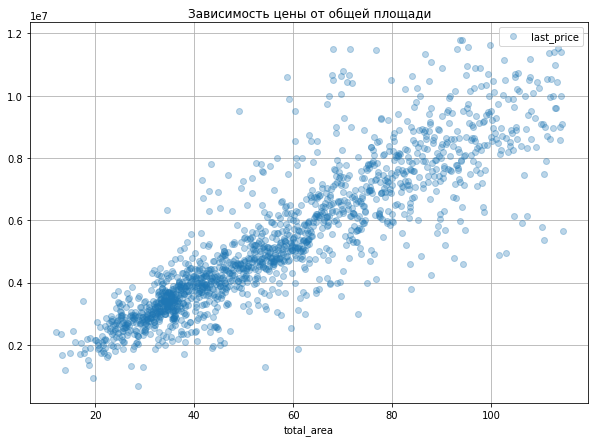

In [48]:
data.pivot_table(index='total_area', values='last_price') \
  .plot(y='last_price', figsize=(10,7), style='o', alpha=0.3, grid=True)

plt.title('Зависимость цены от общей площади')
plt.show()


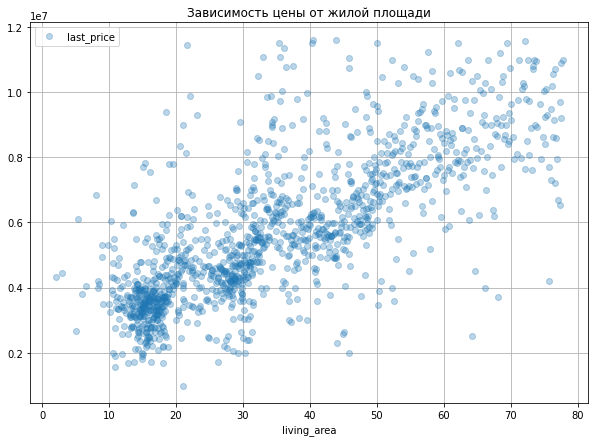

In [49]:
data.pivot_table(index='living_area', values='last_price') \
  .plot(y='last_price', figsize=(10,7), style='o', alpha=0.3, grid=True)

plt.title('Зависимость цены от жилой площади')
plt.show()

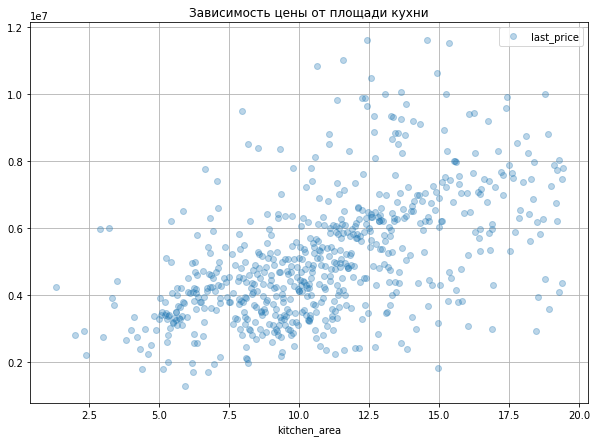

In [50]:
data.pivot_table(index='kitchen_area', values='last_price') \
  .plot(y='last_price', figsize=(10,7), style='o', alpha=0.3, grid=True)

plt.title('Зависимость цены от площади кухни')
plt.show()

Чем больше площадь, тем больше цена

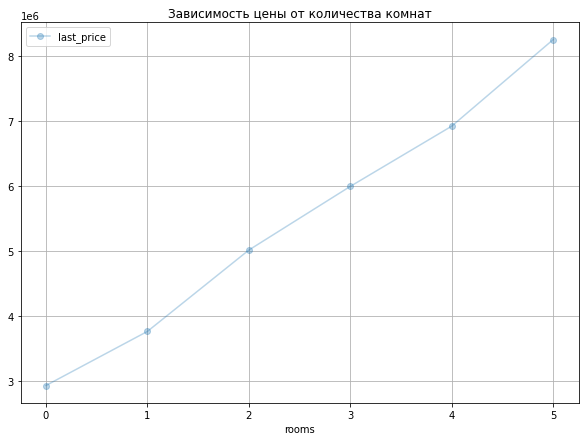

In [51]:
data.pivot_table(index='rooms', values='last_price') \
  .plot(y='last_price', figsize=(10,7), style='o-', alpha=0.3, grid=True)

plt.title('Зависимость цены от количества комнат')
plt.show()

Чем больше комнат, тем выше цена квартиры - прямая зависимость.  

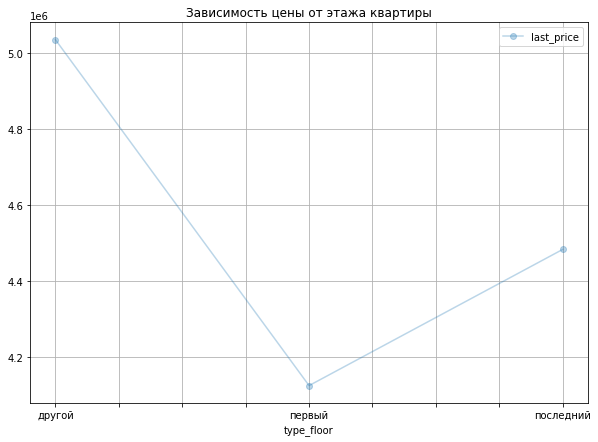

In [52]:
data.pivot_table(index='type_floor', values='last_price') \
  .plot(y='last_price', figsize=(10,7), style='o-', alpha=0.3, grid=True)

plt.title('Зависимость цены от этажа квартиры')
plt.show()

Цена квартиры на 1 этаже самая низкая.  

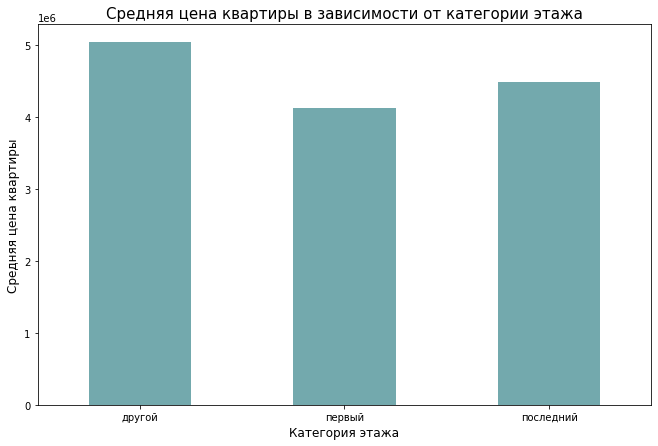

In [53]:
# код ревьюера

data.groupby('type_floor')['last_price'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от категории этажа', size=15)
plt.xlabel('Категория этажа', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

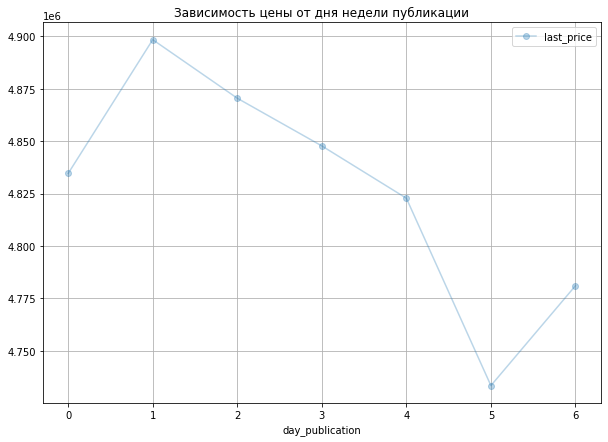

In [54]:
data.pivot_table(index='day_publication', values='last_price') \
  .plot(y='last_price', figsize=(10,7), style='o-', alpha=0.3, grid=True)

plt.title('Зависимость цены от дня недели публикации')
plt.show()

Цена на квартиру будет меньше, если объявление выложили в выходные дни

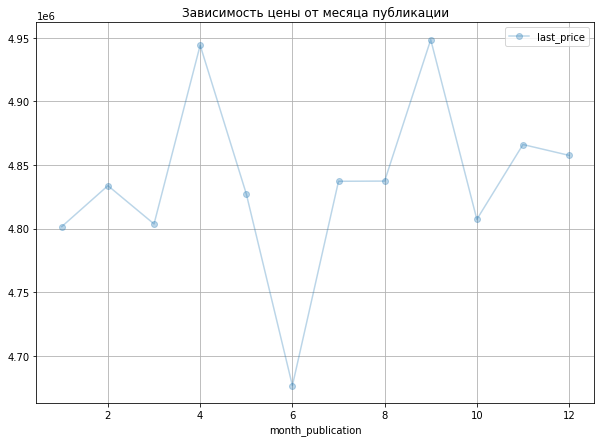

In [55]:
data.pivot_table(index='month_publication', values='last_price') \
  .plot(y='last_price', figsize=(10,7), style='o-', alpha=0.3, grid=True)

plt.title('Зависимость цены от месяца публикации')
plt.show()

В июне заметна просадка цен на квартиру. 

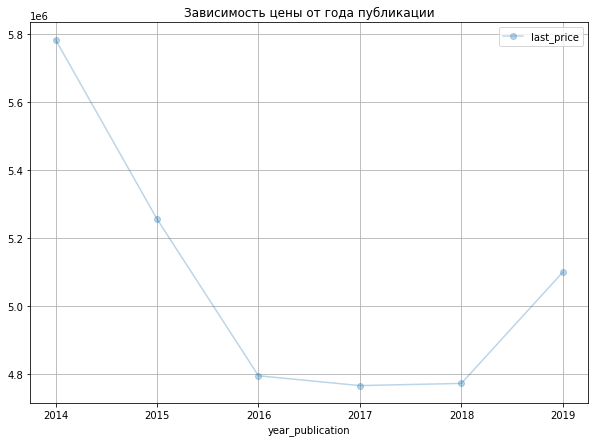

In [56]:
data.pivot_table(index='year_publication', values='last_price') \
  .plot(y='last_price', figsize=(10,7), style='o-', alpha=0.3, grid=True)

plt.title('Зависимость цены от года публикации')
plt.show()

Заметна просадка цен на квартиру в 2016-2018 годах

4.4.Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [57]:
total_ads = data.pivot_table(index='locality_name', values='last_price', aggfunc='count')
total_ads.columns = ['count']
total_ads = total_ads.sort_values(by='count', ascending=False).head(10)
total_ads['price_square_meter'] = data.pivot_table(index='locality_name', values='price_square_meter')
total_ads.sort_values(by='price_square_meter', ascending=False).head(10)

,count,price_square_meter
locality_name,,
Санкт-Петербург,13737,114849.008793
Пушкин,338,103125.819377
Кудрово,470,95324.930508
Парголово,327,90175.913089
Мурино,590,86087.512017
Шушары,440,78677.364318
Колпино,336,75424.579112
Гатчина,305,68746.146515
Всеволожск,397,68654.473970


Из 10 самых популярных локаций самая дорогая цена квадратного метра в Санкт-Петербурге, а самая низкая в Выборге

4.5. Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра. Учитывайте каждый километр расстояния: узнайте среднюю цену квартир в одном километре от центра, в двух и так далее. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.

In [58]:
data.query('locality_name == "Санкт-Петербург"')['city_centers_nearest_km'].describe()

count    15660.000000
mean        11.596041
std          4.863594
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: city_centers_nearest_km, dtype: float64

<AxesSubplot:xlabel='city_centers_nearest_km'>

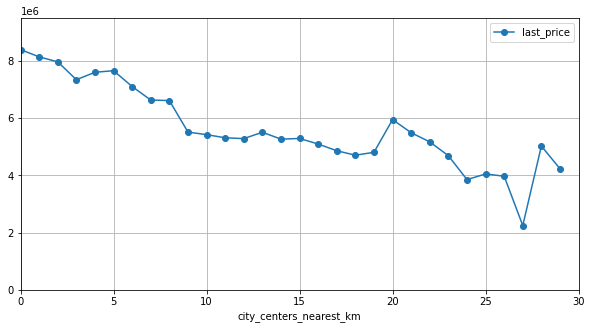

In [59]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0, 30), ylim=(0, 9.5e+06), figsize=(10, 5))
)

In [60]:
data.query('locality_name == "Санкт-Петербург" and city_centers_nearest_km < 32').pivot_table(index='city_centers_nearest_km', values='last_price')

,last_price
city_centers_nearest_km,
0.0,8.398000e+06
1.0,8.145277e+06
2.0,7.970519e+06
3.0,7.346575e+06
4.0,7.606618e+06
5.0,7.661225e+06
6.0,7.108234e+06
7.0,6.635321e+06
8.0,6.617244e+06


Чем дальше от центра города, тем дешевле квартира 

### Напишите общий вывод



На рынке самое большое предложение квартир с характеристиками:
 - общая площадь от 30 до 70 кв.м.
 - жилая площадь от 15 до 30 кв. метров (есть спад предложения около 25 кв.м.)
 - площадь кухни от 6 до 12 кв.м.
 - цена объекта 3-4 млн.
 - количество комнат 1-3 
 - высота потолков 2,5-2,8 м.
 - в пятиэтажных и девятиэтажных домах
 - на расстоянии 12 -15 км от центра (спальный район)
 - со средним расстоянием до парка примерно 200 - 700 метров
</div>
 
А также выявлены следующие закономерности:
 - чем дальше от центра города, тем дешевле квартира
 - обычно продажа занимает до 100 дней (3-4 месяца), быстрыми продажами можно считать меньше 45 дней (месяц), необычно долгими больше 232 дней (больше полугода)
 - заметна прямая зависимость между: ценой и полной площадью, ценой и жилой площадью
 - возможно есть зависимость между ценой квартиры и днем публикации объявления: цена на квартиру будет меньше, если объявление выложили в выходные дни.
 - в июне заметна просадка цен на квартиру, а также заметна просадка цен на квартиру в 2016-2018 годах
 - из 10 самых популярных локаций самая дорогая цена квадратного метра в Санкт-Петербурге, а самая низкая в Выборге.